### Library 

In [2]:
import sys
import os
import datetime
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
import seaborn as sn
from scipy import stats

path_main_folder = '/home/antorosi/Documents/AutoEncoder'

sys.path.append(path_main_folder)

from CVAE.cvae import compile_cvae, run_cvae
from CVAE.cvae_model import CVAE_temp
from conso.load_shape_data import *  
from conso.conso_helpers import plot_latent_space_projection, pyplot_latent_space_projection_temp, pyplot_latent_space_projection_error
from sklearn.manifold import TSNE

### Load and shape data 

In [3]:
# Load raw data
path_data = os.path.join(path_main_folder, 'data')
dict_data_conso = load_data_conso(path_data)

In [4]:
# Load Holiday day information
holiday_days_csv = os.path.join(path_data, "joursFeries.csv")
holiday_days_df = pd.read_csv(holiday_days_csv, sep=";")
holiday_days_df.ds = pd.to_datetime(holiday_days_df.ds)
holiday_days_df['is_hd'] = 1

In [5]:
# Unifomization
data_conso_df, dict_colnames_conso = get_uniformed_data_conso(dict_data_conso)

In [6]:
# Change ganularity ?
name_granu = '30m'
data_conso_df = change_granularity(data_conso_df, granularity="30min")

In [7]:
# Get x_conso dataframe for autoencoder purpose
x_conso = get_x_conso_autoencoder(data_conso_df, dict_colnames_conso)

### Build dataset 

In [8]:
# Split train and test
#date_test_start = datetime.date(2014,1,1)
#date_test_end = datetime.date(2015,1,1)
#dict_xconso = get_train_test_x_conso(x_conso, date_test_start, date_test_end)

dict_xconso = {'train': x_conso}

In [9]:
# Normalize x_conso
type_scaler = 's'
dict_xconso, _ = normalize_xconso(dict_xconso, dict_colnames_conso, type_scaler = 'standard')

In [10]:
name_type_cond = 'm-wd-temp'
name_train = '0' # 1: first period ; 0 all periods
name_type_x = 'c'
type_x = ['conso']
type_cond = ['month', 'weekday', 'temperature']

In [11]:
dataset = get_dataset_autoencoder(dict_xconso=dict_xconso, type_x=type_x, type_cond=type_cond)

In [12]:
# modify dataset to fit with new data format
cond_pre = dataset['train']['x'][1][:,:14]
to_emb = dataset['train']['x'][1][:,14:]
x = dataset['train']['x'][0]

dataset['train']['x'] = [x, cond_pre, to_emb]

In [13]:
dataset['train']['x'][2].shape

(1830, 48)

### Build model

In [590]:
path_out = os.path.join(path_main_folder, 'out')

In [813]:
# Parameters
e_dims=[48,24]
d_dims=[24,48]
emb_dims=[2]
cond_pre_dim = dataset['train']['x'][1].shape[1]
input_dim = dataset['train']['x'][0].shape[1]
to_emb_dim = dataset['train']['x'][2].shape[1]
z_dim= 5
beta = 0.1

In [814]:
name_model = 'cvae_conso_temp-emb_e48-24_d24-48_gran-{}_x-{}_cond-{}'.format(name_granu,name_type_x, name_type_cond)
#name_model = 'cvae_classification'

In [815]:
name_model

'cvae_conso_temp-emb_e48-24_d24-48_gran-30m_x-c_cond-m-wd_temp'

In [816]:
model = CVAE_temp(input_dim=input_dim,
                  to_emb_dim=to_emb_dim,
                  cond_pre_dim=cond_pre_dim, 
                  e_dims=e_dims, 
                  d_dims=d_dims, 
                  emb_dims=emb_dims,
                  z_dim=z_dim, 
                  beta=beta,
                  name=name_model, 
                  output=path_out)

complete model: 
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
to_emb (InputLayer)             (None, 48)           0                                            
__________________________________________________________________________________________________
cond_pre (InputLayer)           (None, 14)           0                                            
__________________________________________________________________________________________________
embedding (Model)               (None, 2)            98          to_emb[0][0]                     
__________________________________________________________________________________________________
x_true (InputLayer)             (None, 48)           0                                            
____________________________________________________________________________________________

### Trainning model 



--- START TRAINING ---

Epoch 1/200
1830/1830 [==============================] - 2s 975us/step - loss: 17.8888 - kl_loss: 13.9097 - recon_loss: 16.4978
Epoch 2/200
1830/1830 [==============================] - 0s 86us/step - loss: 3.1929 - kl_loss: 9.8247 - recon_loss: 2.2104
Epoch 3/200
1830/1830 [==============================] - 0s 83us/step - loss: 2.2353 - kl_loss: 7.7798 - recon_loss: 1.4573
Epoch 4/200
1830/1830 [==============================] - 0s 86us/step - loss: 1.8515 - kl_loss: 6.6537 - recon_loss: 1.1861
Epoch 5/200
1830/1830 [==============================] - 0s 84us/step - loss: 1.6377 - kl_loss: 6.1217 - recon_loss: 1.0255
Epoch 6/200
1830/1830 [==============================] - 0s 89us/step - loss: 1.5115 - kl_loss: 5.6912 - recon_loss: 0.9423
Epoch 7/200
1830/1830 [==============================] - 0s 81us/step - loss: 1.3717 - kl_loss: 5.4331 - recon_loss: 0.8284
Epoch 8/200
1830/1830 [==============================] - 0s 84us/step - loss: 1.3058 - kl_loss: 5.2344

1830/1830 [==============================] - 0s 96us/step - loss: 0.4940 - kl_loss: 2.1149 - recon_loss: 0.2826
Epoch 132/200
1830/1830 [==============================] - 0s 102us/step - loss: 0.4912 - kl_loss: 2.1505 - recon_loss: 0.2761
Epoch 133/200
1830/1830 [==============================] - 0s 97us/step - loss: 0.4959 - kl_loss: 2.0761 - recon_loss: 0.2883
Epoch 134/200
1830/1830 [==============================] - 0s 90us/step - loss: 0.4863 - kl_loss: 2.0967 - recon_loss: 0.2766
Epoch 135/200
1830/1830 [==============================] - 0s 89us/step - loss: 0.4929 - kl_loss: 2.0716 - recon_loss: 0.2858
Epoch 136/200
1830/1830 [==============================] - 0s 89us/step - loss: 0.4978 - kl_loss: 2.0904 - recon_loss: 0.2888
Epoch 137/200
1830/1830 [==============================] - 0s 90us/step - loss: 0.4931 - kl_loss: 2.0966 - recon_loss: 0.2834
Epoch 138/200
1830/1830 [==============================] - 0s 87us/step - loss: 0.4862 - kl_loss: 2.1118 - recon_loss: 0.2750
Epoch

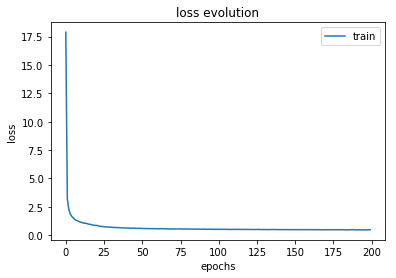

In [817]:
model.main_train(dataset, training_epochs=200, batch_size=20, verbose=False)

In [818]:
with open(os.path.join(path_out,name_model,"config.txt"),'w') as file: 
    file.write(str(cond_pre_dim) + '\n')
    file.write(str(emb_dims) + '\n')
    file.write(str(e_dims) + '\n') 
    file.write(str(d_dims) + '\n') 
    file.write(str(z_dim) + '\n')
    file.write(str(beta) + '\n')

## Loading model 

In [819]:
#model.load_model(os.path.join(path_out, name_model, 'models'))

### Analysis of the latent space

In [824]:
name_set_plot = 'train'
version = '-v1'

In [825]:
dataset['train']['x'][2].shape

(1830, 48)

In [826]:
temp_emb = model.embedding.predict(dataset['train']['x'][2])
cond_pre = dataset['train']['x'][1]
cond = np.concatenate((cond_pre, temp_emb), axis=1)

x_input = dataset['train']['x'][0]

input_encoder = [x_input, cond]

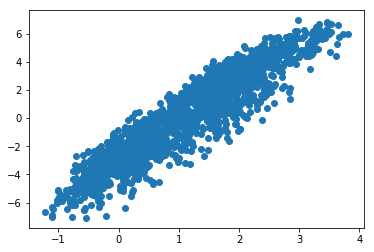

In [827]:
plt.scatter(temp_emb[:,0], temp_emb[:,1])

In [828]:
x_encoded = model.encoder.predict(input_encoder)[0]

In [829]:
# t-sne if latent space more than 2 dimension
x_encoded = TSNE(n_components=2).fit_transform(x_encoded)

In [830]:
calendar_info = pd.DataFrame(dataset[name_set_plot]['ds'])
calendar_info['month'] = calendar_info.ds.dt.month
calendar_info['weekday'] = calendar_info.ds.dt.weekday
calendar_info['is_weekday'] = (calendar_info.weekday < 5).apply(lambda x:int(x))
calendar_info = pd.merge(calendar_info, holiday_days_df[['ds', 'is_hd']], on='ds', how ='left')
calendar_info.loc[calendar_info['is_hd'].isna(),'is_hd'] = 0

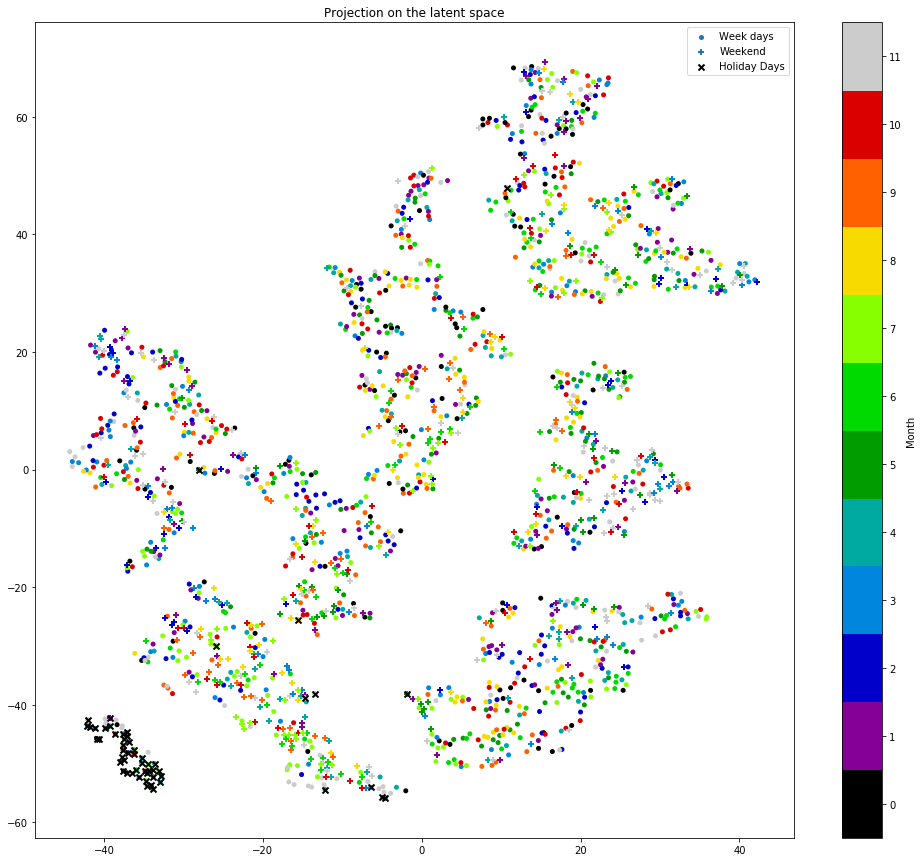

In [831]:
name_plot = 'emb{}_z{}_n-{}_beta-{}_train-{}_set-{}_cond-{}{}'.format(str(emb_dims[-1]),str(z_dim),type_scaler,str(beta), name_train, name_set_plot,str(name_type_cond),version)
plot_latent_space_projection(x_proj=x_encoded, calendar_info=calendar_info,
                             path_folder_out=os.path.join(path_out,name_model,'results'), name=name_plot, 
                             pyplot=True, plotly = False)

In [832]:
temp = get_cond_autoencoder(dataset['train']['x'],dataset['train']['ds'], type_cond=['temp'], data_conso_df=data_conso_df)
temp = temp.flatten()

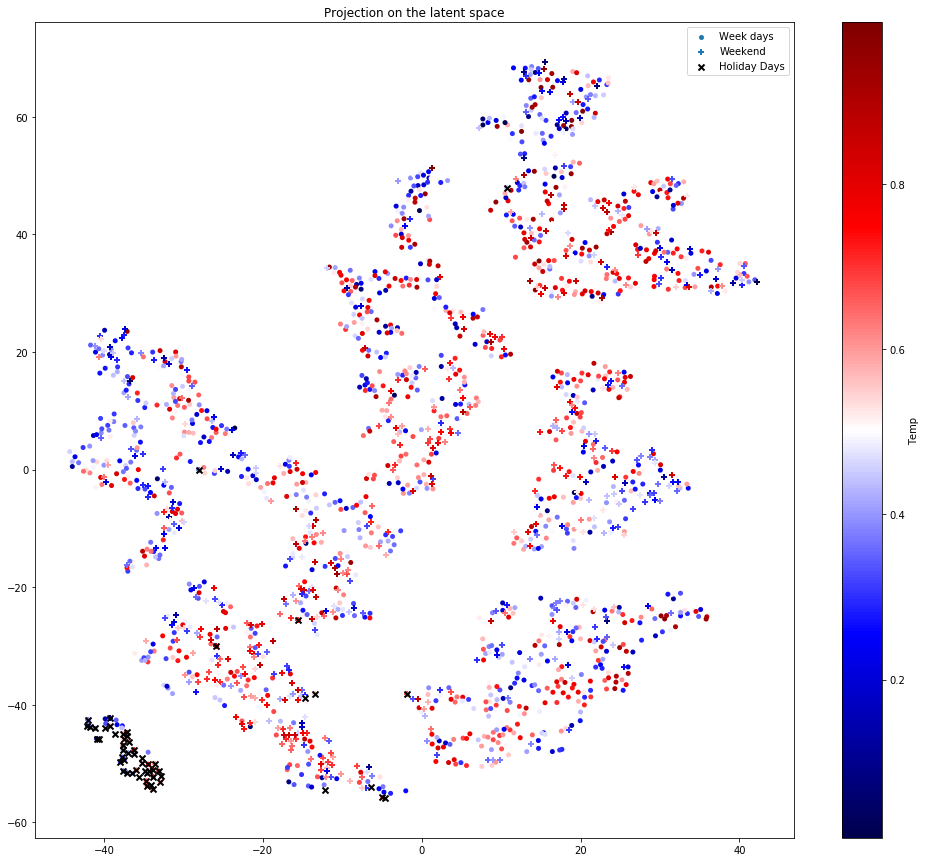

In [833]:
name_plot = 'emb{}_temp_z{}_n-{}_beta-{}_train-{}_set-{}_cond-{}{}'.format(str(emb_dims[-1]),str(z_dim),type_scaler,str(beta), name_train, name_set_plot,str(name_type_cond),version)
pyplot_latent_space_projection_temp(x_encoded, calendar_info, temp,os.path.join(path_out,name_model,'results'), name_plot)

### Analyse of the reconstruction error

In [834]:
x_hat = model.cvae.predict(x=dataset['train']['x'])

In [835]:
res_mat = (x - x_hat)
res = res_mat.mean(axis=1)

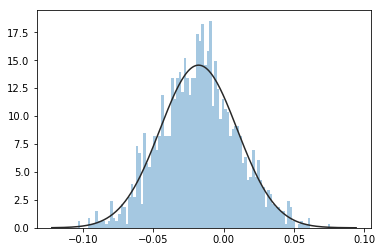

In [629]:
sn.distplot(res, kde=False, fit=stats.norm, bins=100)

In [836]:
res_conso_mat = res_mat[:,:48]
res_temp_mat = res_mat[:,48:]

In [837]:
res_conso = res_conso_mat.mean(axis=1)
res_temp = res_temp_mat.mean(axis=1)

/local/home/antorosi/PycharmProjects/KERAS-TS-VENV/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

Mean of empty slice.

/local/home/antorosi/PycharmProjects/KERAS-TS-VENV/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning:

invalid value encountered in true_divide



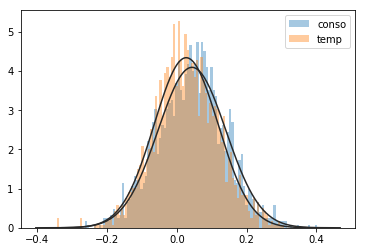

In [174]:
sn.distplot(res_conso, kde=False, fit=stats.norm, bins=100, label='conso')
sn.distplot(res_temp, kde=False, fit=stats.norm, bins=100, label='temp')
plt.legend()

In [838]:
results = dict()
results['me'] = {'all': res, 'temp': res_temp, 'conso': res_conso}

In [839]:
results['mae'] = {
    'all': np.apply_along_axis(lambda x: np.abs(x).mean(),1, res_mat),
    'conso': np.apply_along_axis(lambda x: np.abs(x).mean(),1, res_conso_mat),
    'temp': np.apply_along_axis(lambda x: np.abs(x).mean(),1, res_temp_mat)
}

/local/home/antorosi/PycharmProjects/KERAS-TS-VENV/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

Mean of empty slice.

/local/home/antorosi/PycharmProjects/KERAS-TS-VENV/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning:

invalid value encountered in double_scalars



In [840]:
results['z_score'] = {}
results['a_score'] = {}

for key, me in results['me'].items():
    z_score = stats.zscore(me)
    a_score = 1-2 * stats.norm.cdf(-np.abs(z_score))
    
    results['z_score'][key] = z_score
    results['a_score'][key] = a_score

/local/home/antorosi/PycharmProjects/KERAS-TS-VENV/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning:

invalid value encountered in greater

/local/home/antorosi/PycharmProjects/KERAS-TS-VENV/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning:

invalid value encountered in less

/local/home/antorosi/PycharmProjects/KERAS-TS-VENV/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning:

invalid value encountered in greater_equal



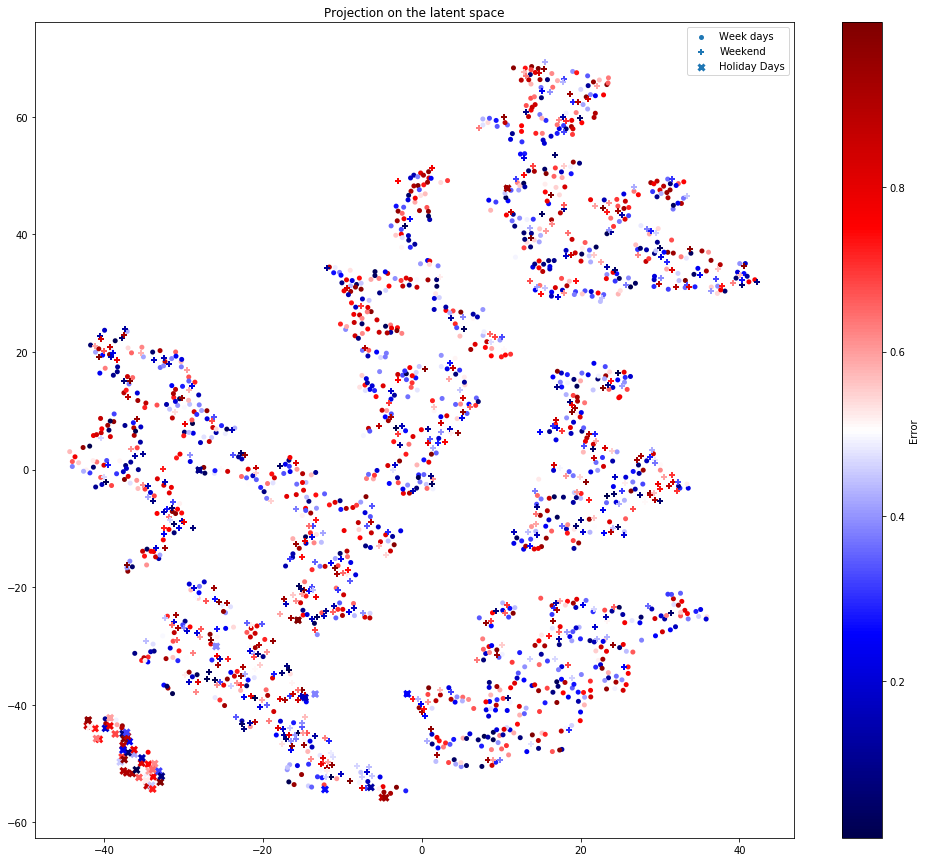

In [841]:
type_error = 'a_score'
type_data = 'all'

name_plot = 'emb{}_{}_z{}_n-{}_beta-{}_train-{}_set-{}_cond-{}{}'.format(str(emb_dims[-1]),type_error,str(z_dim),type_scaler,str(beta), name_train, name_set_plot,str(name_type_cond),version)

path_plot = os.path.join(path_out,name_model,'results')

error = results[type_error][type_data]
pyplot_latent_space_projection_error(x_encoded, calendar_info, error, color='seismic', path_folder_out=path_plot, name=name_plot)

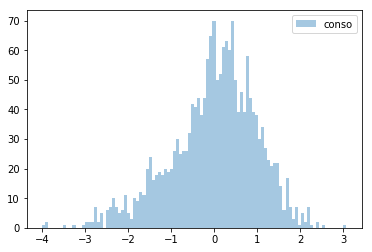

In [91]:
sn.distplot(results['z_score']['conso'], kde=False, bins=100, label='conso')
plt.legend()

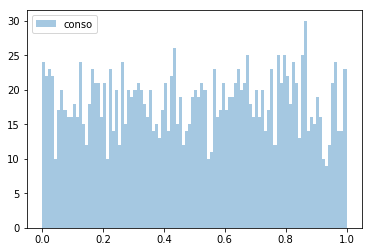

In [146]:
sn.distplot(results['a_score']['conso'], kde=False, bins=100, label='conso')
plt.legend()

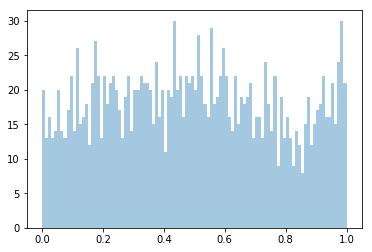

In [228]:
sn.distplot(stats.norm.cdf(results['z_score']['conso']), kde=False, bins=100, label='conso')

In [194]:
indice = 200

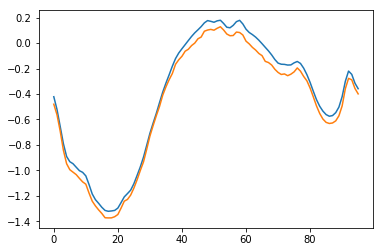

In [195]:
plt.plot(x[indice,])
plt.plot(x_hat[indice,])

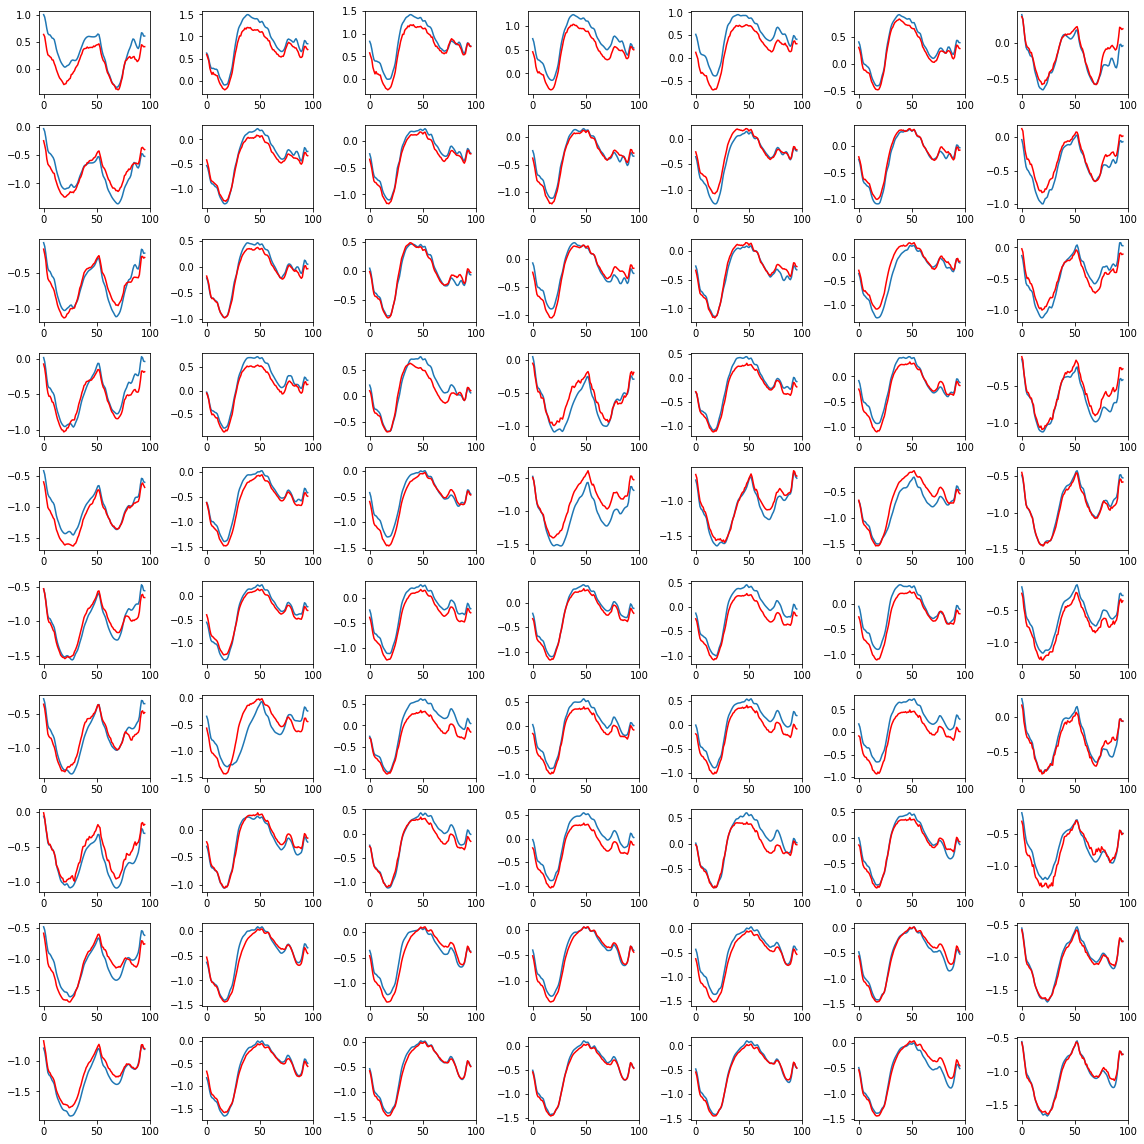

In [193]:
fig, axes = plt.subplots(10,7, figsize=(16,16))

ind = 100

for ax_row in axes:
    for ax in ax_row:
        # create a twin of the axis that shares the x-axis
        # plot some data on each axis.
        ax.plot(x[ind,:])
        ax.plot(x_hat[ind,:],'-r')
        
        ind+=1

plt.tight_layout()
plt.show()

In [228]:
model.history.keys()

dict_keys(['kl_loss', 'loss', 'recon_loss'])

In [229]:
el = model.history


In [231]:
el['kl_loss'][-1]

1.3353316627564977

In [85]:
path_out

'/home/antorosi/Documents/AutoEncoder/out'

In [606]:
l = [3,2,1]

In [608]:
l[:-1]

[3, 2]

In [609]:
l = [3]

In [610]:
l[:-1]

[]